In [81]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os
import galsim
import numpy as np
import matplotlib.pylab as plt
import time
import fpfs

import sys
sys.path.append('/home/b7009348/FPFS-project/')

import batsim.pltutil as batplot
from batsim.stamp import Stamp
from batsim.transforms import LensTransform

Text(0.5, 1.0, 'Preliminary')

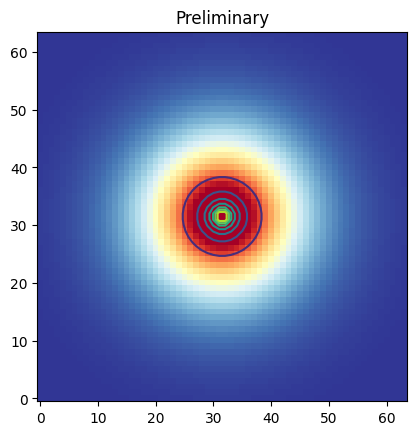

In [82]:
## create a galaxy with raidall dependent shear
flux = 40
scale = 0.2
nn = 64
hlr = 1.4

# create galaxy to be sampled by shear stamp objects
sersic_gal = galsim.Sersic(n=1.5, half_light_radius=hlr, flux=flux, trunc=0)

g1 = 0.0
g2 = 0.0

# # apply lensing shear to galaxy
stamp = Stamp(nn=nn, scale=scale)
lens = LensTransform(g1=g1, g2=g2, kappa=0)
#stamp.transform_grids(lens)

# get galaxy array from stamp object
gal_array = stamp.sample_galaxy(sersic_gal)
batplot.make_plot_image(gal_array)
plt.contour(gal_array)
plt.title('Preliminary')

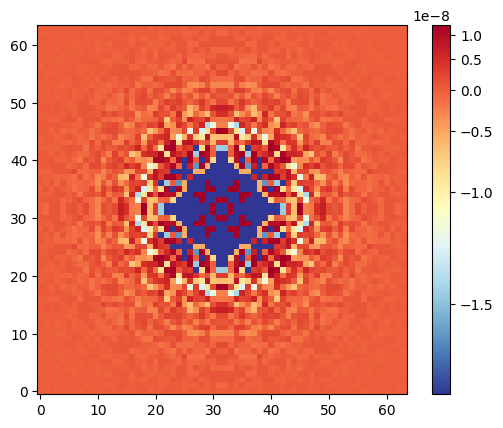

In [83]:
gal_compare = sersic_gal.shear(g1=g1).drawImage(nx=64, ny=64, scale=scale, method='sb')
gal_compare = gal_compare.array
batplot.make_plot_image(gal_compare-gal_array)
plt.colorbar()

In [49]:
# define sheared PSF
psf_array = np.zeros(stamp.shape)
psf_array[nn // 2, nn // 2] = 1

coords = np.array([nn//2, nn//2])
fpTask  =   fpfs.image.measure_source(psf_array, pix_scale=scale, sigma_arcsec=0.6)
mms =  fpTask.measure(gal_array, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print("measured shear: %.5f" % shear)

2023/10/16 20:31:14 ---  Order of the shear estimator: nnord=4
2023/10/16 20:31:14 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/16 20:31:14 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


measured shear: 0.02002


In [50]:
fpTask  = fpfs.image.measure_source(psf_array, pix_scale=scale, sigma_arcsec=1.0)
mms =  fpTask.measure(gal_array, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print("measured shear: %.5f" % shear)

2023/10/16 20:31:15 ---  Order of the shear estimator: nnord=4
2023/10/16 20:31:15 ---  Shapelet kernel in configuration space: sigma= 1.0000 arcsec
2023/10/16 20:31:15 ---  Detection kernel in configuration space: sigma= 1.0000 arcsec


measured shear: 0.02000
